# C02 PCA + t-SNE

Principle Component Analysis and t-SNE attempts to visualize separability of data.

In [1]:
import pandas as pd
import numpy as np
from cmapPy.pandasGEXpress.parse import parse
import time
import matplotlib.pyplot as plt
import seaborn as sns

Importing data

In [2]:
gene_info = pd.read_csv("../C02_Antihypersensitives_Analysis/geneinfo_beta.txt", sep = "\t", dtype = str)
# landmark_ids = gene_info["gene_id"][gene_info["feature_space"] == "landmark"]

C02_gctoo = parse("../C02_Antihypersensitives_Analysis/C02_gctoo.gctx")

df = C02_gctoo.data_df
df = df.T
df_copy = df.copy()
df

rid,10,100,1000,10000,10001,10003,10004,10005,10006,10007,...,9985,9987,9988,9989,999,9990,9991,9992,9993,9997
cid,,,,,,,,,,,,,,,,,,,,,
CPC001_HA1E_24H:BRD-A58207013-001-01-2:10,0.751033,0.188135,-0.417456,-0.254777,0.128391,0.304665,0.521011,0.130014,-0.200290,-0.324510,...,0.600573,-0.113586,0.324089,0.486886,-0.502584,-1.140248,-0.477325,-0.432886,0.254049,-1.052680
CPC001_HA1E_6H:BRD-A58207013-001-01-2:10,0.652660,0.403431,-0.127691,0.247779,-0.048276,1.090995,0.437746,-0.073704,-0.764020,-0.344635,...,-0.341926,0.371422,-0.635963,0.186507,1.811464,-0.356274,-0.409917,-0.242116,0.434955,0.522112
CPC001_HCC515_24H:BRD-A58207013-001-01-2:10,0.317769,0.458129,0.354426,0.313862,-0.147139,0.453614,0.149294,-0.357259,-0.551688,0.149783,...,-0.118588,0.093899,0.833043,0.395147,-0.147208,-0.264033,-0.186652,0.122579,-0.557079,0.495941
CPC001_HCC515_6H:BRD-A58207013-001-01-2:10,0.732750,0.027450,0.836950,-0.111700,-0.461350,0.546300,-0.939050,-0.606300,1.032300,0.590500,...,-0.789550,0.298100,0.089900,-0.656750,0.086900,-0.441850,1.698200,0.037850,-0.430900,-0.079400
CPC001_PC3_24H:M19,-0.156408,-0.371953,0.045374,0.419639,0.224261,-0.185020,-0.303001,0.451265,0.178188,-0.078289,...,-0.436926,-0.251435,-0.260665,-0.603009,-0.250826,0.001271,0.028083,-0.642210,0.137168,-0.771488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REP.B028_YAPC_24H:L02,-1.135650,0.239400,-0.008250,-1.304650,-0.067100,-0.392250,-0.846150,-0.885700,-0.068500,0.126650,...,-0.511600,1.239900,1.120050,0.261150,-0.008550,-0.420500,1.122650,-0.543900,0.240250,0.980450
REP.B028_YAPC_24H:L03,0.231000,0.454800,0.299900,-0.739200,-0.385400,-0.277400,1.077850,-0.485200,0.674000,0.339250,...,0.107300,-0.039600,-2.320850,0.763050,0.890750,-0.493650,0.704150,0.541900,0.079500,-0.446250
REP.B028_YAPC_24H:L04,-1.264500,-0.209450,0.389700,-1.462050,1.219400,-0.437800,0.271050,2.562100,0.940850,0.820500,...,-0.242250,0.074450,0.073800,-1.155550,0.117200,-1.375750,0.850950,-0.110900,-0.582900,-1.065300


In [3]:
is_of_interest_array = np.loadtxt("../C02_Antihypersensitives_Analysis/antiadrenergics.csv", delimiter = ",")
is_of_interest_array

array([0., 0., 0., ..., 1., 1., 1.])

## PCA

In [4]:
from sklearn.decomposition import PCA
c02_PCA = PCA(n_components = 3)

In [5]:
components = c02_PCA.fit(df).components_
components = pd.DataFrame(components).transpose()
components.columns = ['Comp1', 'Comp2', "Comp3"]
components.index = df.columns
print(components)

          Comp1     Comp2     Comp3
rid                                
10     0.009383 -0.004476 -0.011767
100    0.003168 -0.003965  0.007150
1000  -0.006912  0.011956 -0.013207
10000  0.004182 -0.008402 -0.008868
10001 -0.005374  0.008755 -0.000578
...         ...       ...       ...
9990   0.011734  0.006726  0.004145
9991  -0.001315  0.020692 -0.005191
9992   0.017878  0.002325 -0.004462
9993   0.008473 -0.009606  0.025757
9997  -0.000286 -0.015255  0.007377

[12328 rows x 3 columns]


In [6]:
var_ratio = c02_PCA.explained_variance_ratio_
var_ratio_transposed = pd.DataFrame(var_ratio).transpose()
var_ratio_transposed.columns = ['Comp1', 'Comp2', "Comp3"]
var_ratio_transposed.index = ['Proportion of Variance']
print(var_ratio_transposed)

                           Comp1     Comp2     Comp3
Proportion of Variance  0.162091  0.031875  0.017448


In [7]:
pca_result = c02_PCA.fit_transform(df.values)
pca_result

array([[  4.930802 ,  -7.731249 ,   6.594476 ],
       [ 22.683815 , -12.536206 ,  -8.750546 ],
       [-17.60585  ,   7.5580063,   0.3029249],
       ...,
       [-28.99671  ,  21.510992 ,  -2.6434245],
       [-15.658061 ,  19.037012 ,  -8.013448 ],
       [ 16.0804   ,  21.070452 , -10.388734 ]], dtype=float32)

In [8]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]
df["y"] = is_of_interest_array
df

rid,10,100,1000,10000,10001,10003,10004,10005,10006,10007,...,999,9990,9991,9992,9993,9997,pca-one,pca-two,pca-three,y
cid,,,,,,,,,,,,,,,,,,,,,
CPC001_HA1E_24H:BRD-A58207013-001-01-2:10,0.751033,0.188135,-0.417456,-0.254777,0.128391,0.304665,0.521011,0.130014,-0.200290,-0.324510,...,-0.502584,-1.140248,-0.477325,-0.432886,0.254049,-1.052680,4.930802,-7.731249,6.594476,0.0
CPC001_HA1E_6H:BRD-A58207013-001-01-2:10,0.652660,0.403431,-0.127691,0.247779,-0.048276,1.090995,0.437746,-0.073704,-0.764020,-0.344635,...,1.811464,-0.356274,-0.409917,-0.242116,0.434955,0.522112,22.683815,-12.536206,-8.750546,0.0
CPC001_HCC515_24H:BRD-A58207013-001-01-2:10,0.317769,0.458129,0.354426,0.313862,-0.147139,0.453614,0.149294,-0.357259,-0.551688,0.149783,...,-0.147208,-0.264033,-0.186652,0.122579,-0.557079,0.495941,-17.605850,7.558006,0.302925,0.0
CPC001_HCC515_6H:BRD-A58207013-001-01-2:10,0.732750,0.027450,0.836950,-0.111700,-0.461350,0.546300,-0.939050,-0.606300,1.032300,0.590500,...,0.086900,-0.441850,1.698200,0.037850,-0.430900,-0.079400,-28.406521,1.821003,-2.262972,0.0
CPC001_PC3_24H:M19,-0.156408,-0.371953,0.045374,0.419639,0.224261,-0.185020,-0.303001,0.451265,0.178188,-0.078289,...,-0.250826,0.001271,0.028083,-0.642210,0.137168,-0.771488,-6.227245,-2.365188,-3.574175,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REP.B028_YAPC_24H:L02,-1.135650,0.239400,-0.008250,-1.304650,-0.067100,-0.392250,-0.846150,-0.885700,-0.068500,0.126650,...,-0.008550,-0.420500,1.122650,-0.543900,0.240250,0.980450,-39.963070,9.667144,2.807394,1.0
REP.B028_YAPC_24H:L03,0.231000,0.454800,0.299900,-0.739200,-0.385400,-0.277400,1.077850,-0.485200,0.674000,0.339250,...,0.890750,-0.493650,0.704150,0.541900,0.079500,-0.446250,9.519781,10.530790,-2.901096,1.0
REP.B028_YAPC_24H:L04,-1.264500,-0.209450,0.389700,-1.462050,1.219400,-0.437800,0.271050,2.562100,0.940850,0.820500,...,0.117200,-1.375750,0.850950,-0.110900,-0.582900,-1.065300,-28.996710,21.510992,-2.643425,1.0


Plotting variation of each principle component

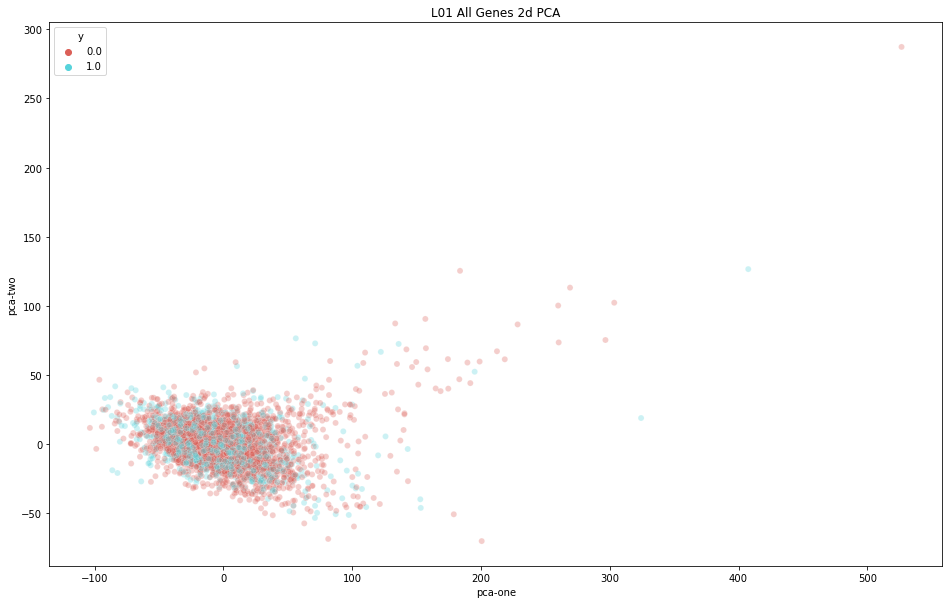

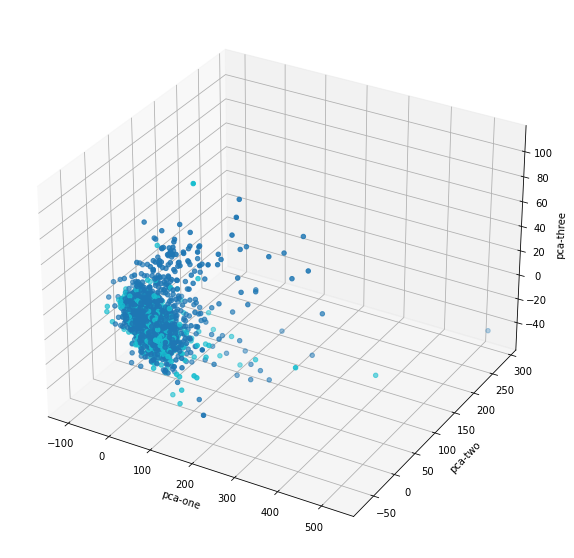

In [9]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3,
).set(title = "L01 All Genes 2d PCA")

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"],
    ys=df["pca-two"],
    zs=df["pca-three"],
    c=df["y"],
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')

plt.show()

# t-SNE

In [10]:
from sklearn.manifold import TSNE

In [12]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df_copy.values)
print(pca_result_50.shape)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

(4044, 50)
Cumulative explained variation for 50 principal components: 0.47918638586997986


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4044 samples in 0.001s...
[t-SNE] Computed neighbors for 4044 samples in 0.417s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4044
[t-SNE] Computed conditional probabilities for sample 2000 / 4044
[t-SNE] Computed conditional probabilities for sample 3000 / 4044
[t-SNE] Computed conditional probabilities for sample 4000 / 4044
[t-SNE] Computed conditional probabilities for sample 4044 / 4044
[t-SNE] Mean sigma: 13.208906
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.496002
[t-SNE] KL divergence after 5000 iterations: 2.435825
t-SNE done! Time elapsed: 132.56393933296204 seconds


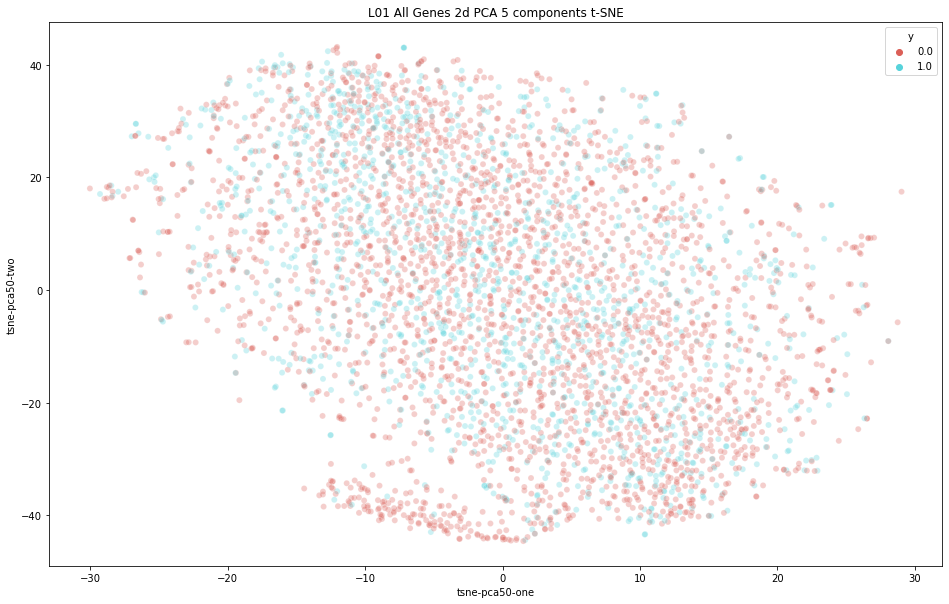

In [13]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_copy['tsne-pca50-one'] = tsne_pca_results[:,0]
df_copy['tsne-pca50-two'] = tsne_pca_results[:,1]
df_copy["y"] = is_of_interest_array

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df_copy,
    legend="full",
    alpha=0.3,
).set(title = "L01 All Genes 2d PCA 5 components t-SNE")
plt.show()